In [1]:
import gym
import matplotlib.pyplot as plt
import torch
import numpy as np
import timebudget
from tqdm.auto import tqdm
timebudget.set_quiet()

In [2]:
import rltrain
from importlib import reload
reload(rltrain)

<module 'rltrain' from '/Users/leodirac/dev/ddpg/rltrain.py'>

In [3]:
env = gym.make('CartPole-v0')
learner = rltrain.DQN(env, gamma=0.9)
learner.show_loss_every = 1000

Creating FCNet with 4->2 dims for 4 observations and 2 actions


In [4]:
import helpers
reload(helpers)

<module 'helpers' from '/Users/leodirac/dev/ddpg/helpers.py'>

2203


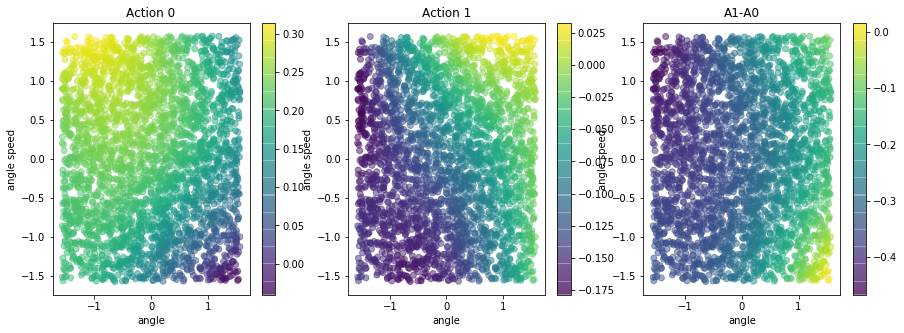

4383


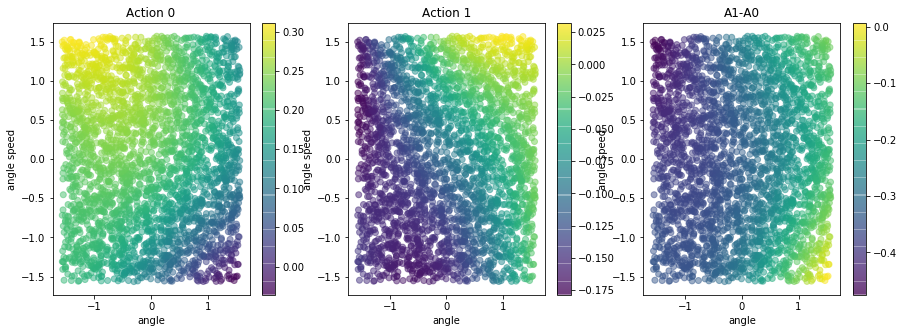

6585


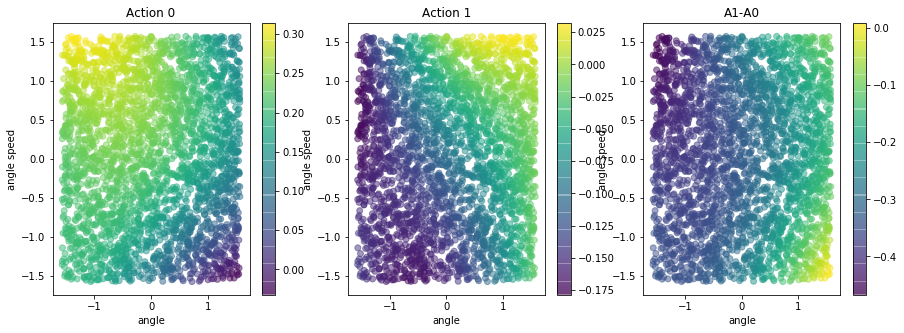

8863


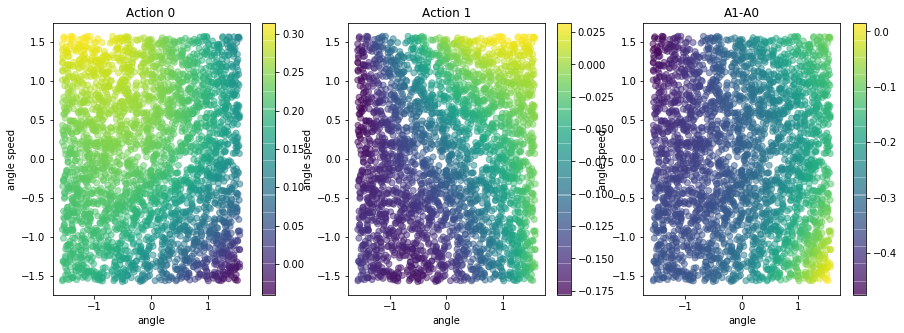

Loss = 0.65605
Loss = 0.39651
11114


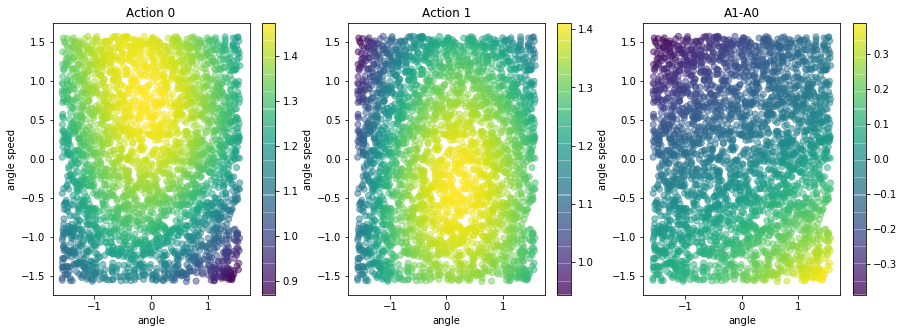

In [5]:
learner.eps = 1
for i in tqdm(range(500), "random warmup"):
    learner.rollout()
    if i % 100 == 99:
        print(len(learner._replay))
        helpers.plot_q(learner)



Eps = 1.00 on 1 of 5
Loss = 0.35561
Loss = 0.34720


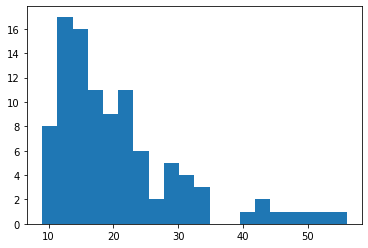

Reward mean,std = 21.000 +/- 9.968


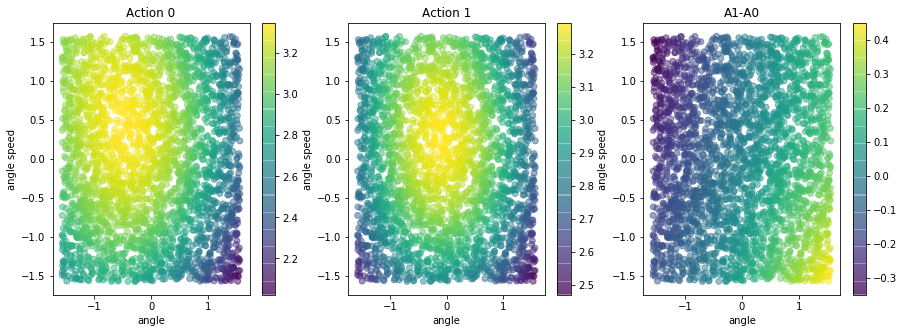



Eps = 0.82 on 2 of 5
Loss = 0.27663
Loss = 0.33447


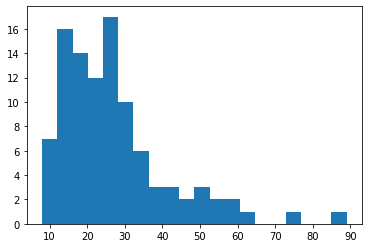

Reward mean,std = 27.500 +/- 14.363


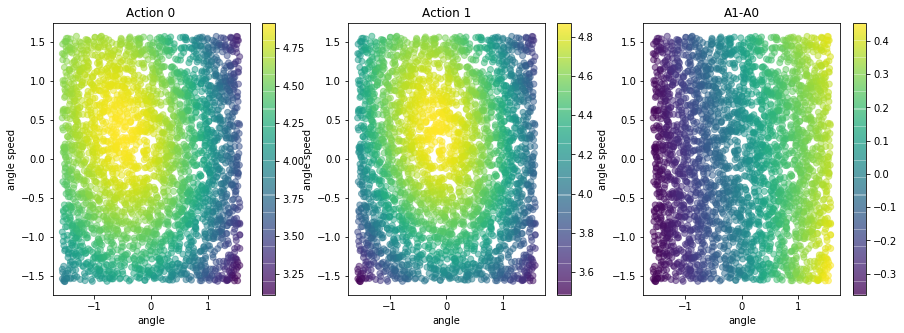



Eps = 0.64 on 3 of 5
Loss = 0.32196
Loss = 0.40729
Loss = 0.10968
Loss = 0.09118
Loss = 0.19400


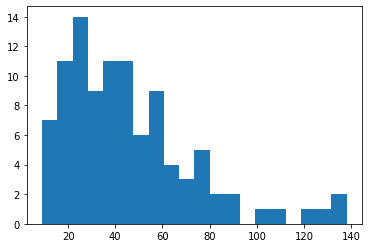

Reward mean,std = 45.830 +/- 27.692


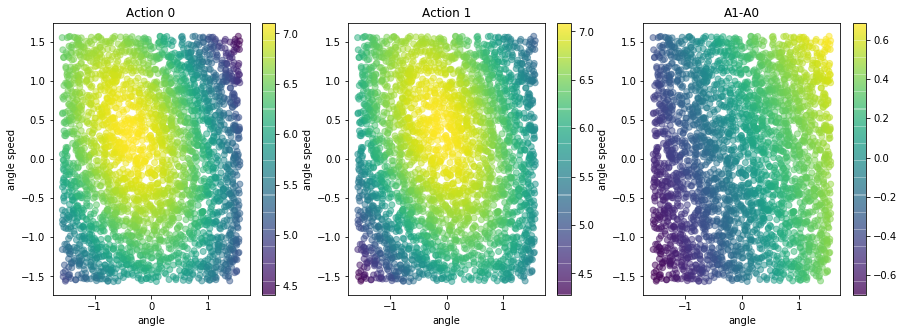



Eps = 0.45 on 4 of 5
Loss = 0.51867
Loss = 0.04773
Loss = 0.38256
Loss = 0.21732
Loss = 0.35480
Loss = 0.36773
Loss = 0.22457
Loss = 0.23065
Loss = 0.01304


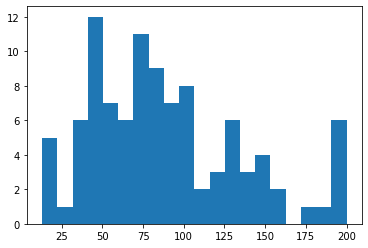

Reward mean,std = 89.520 +/- 46.762


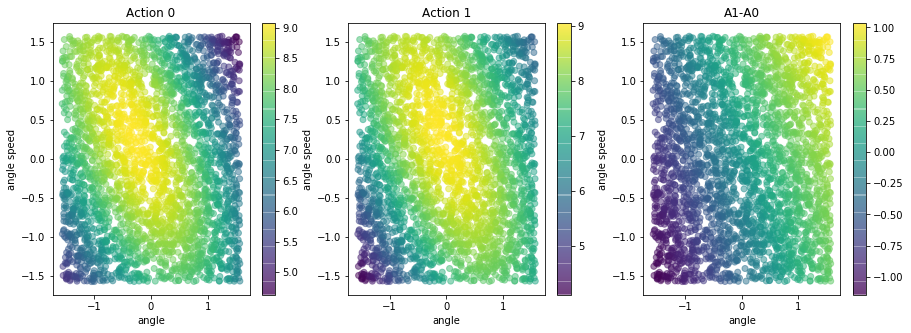



Eps = 0.27 on 5 of 5
Loss = 0.36117
Loss = 0.23649
Loss = 0.36448
Loss = 0.20460
Loss = 0.24057
Loss = 0.48438
Loss = 0.23955
Loss = 0.00589
Loss = 0.62868
Loss = 0.00423
Loss = 0.00361
Loss = 0.22174
Loss = 0.00393
Loss = 0.19795
Loss = 0.00520
Loss = 0.24358
Loss = 0.19829


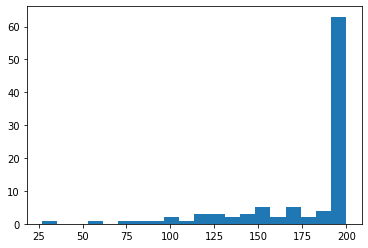

Reward mean,std = 177.100 +/- 37.699


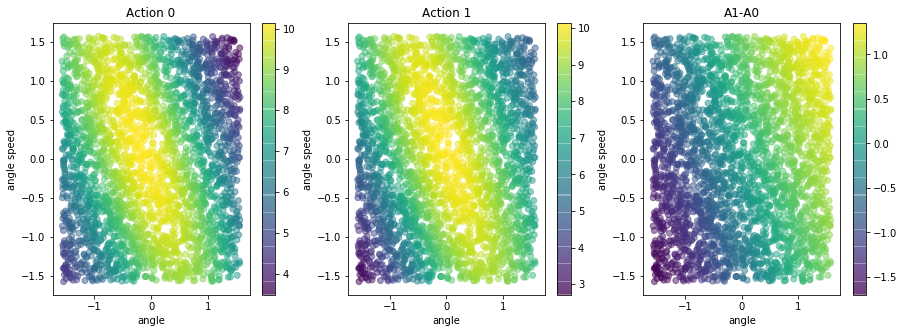

In [6]:
N = 5
for d in range(N):
    eps = 1.0 - d/(N+0.5)
    print(f"\n\nEps = {eps:.2f} on {d+1} of {N}")
    _ = helpers.rollout_score_dist(learner, eps)
    helpers.plot_q(learner)

Loss = 0.00423
Loss = 0.43519
Loss = 0.20651
Loss = 0.17703
Loss = 0.00181
Loss = 0.00163
Loss = 0.00183
Loss = 0.23434
Loss = 0.00277
Loss = 0.20899
Loss = 0.64533
Loss = 0.43371
Loss = 0.00207
Loss = 0.23544
Loss = 0.23011
Loss = 0.00327
Loss = 0.00422
Loss = 0.00205
Loss = 0.27482
Loss = 0.22084


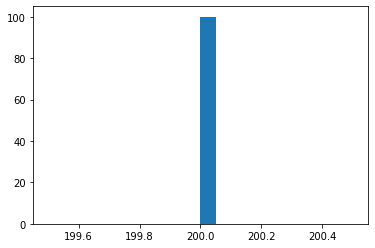

Reward mean,std = 200.000 +/- 0.000


In [7]:
# check greedy
_ = helpers.rollout_score_dist(learner, 0)

Loss = 0.47751
Loss = 0.00076


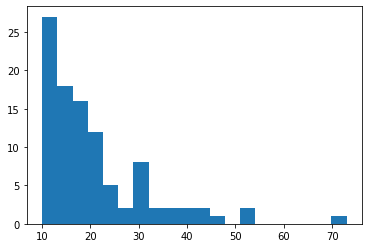

Reward mean,std = 20.470 +/- 10.895


In [8]:
# check random
_ = helpers.rollout_score_dist(learner, 1)

In [9]:
timebudget.report('rollout')

timebudget report per rollout cycle...
                  rollout: 100.0%    52.86ms/cyc @     1.0 calls/cyc
              do_learning:  89.5%    47.32ms/cyc @    56.7 calls/cyc
                optimizer:  50.3%    26.61ms/cyc @    48.8 calls/cyc
                   sample:  14.7%     7.79ms/cyc @    48.8 calls/cyc
                 q_target:  10.1%     5.34ms/cyc @    48.8 calls/cyc


In [10]:
learner.eps=0
learner.rollout(render=True)

(199, 200.0)